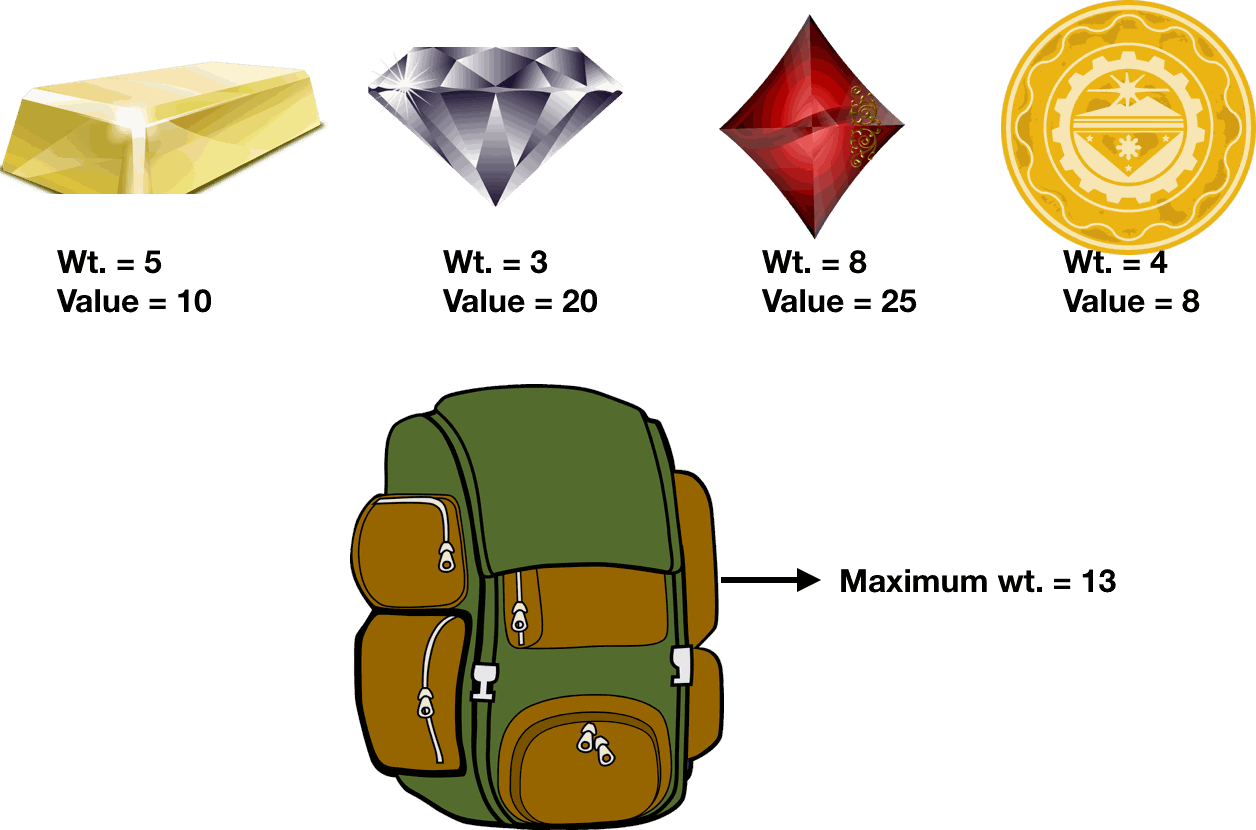

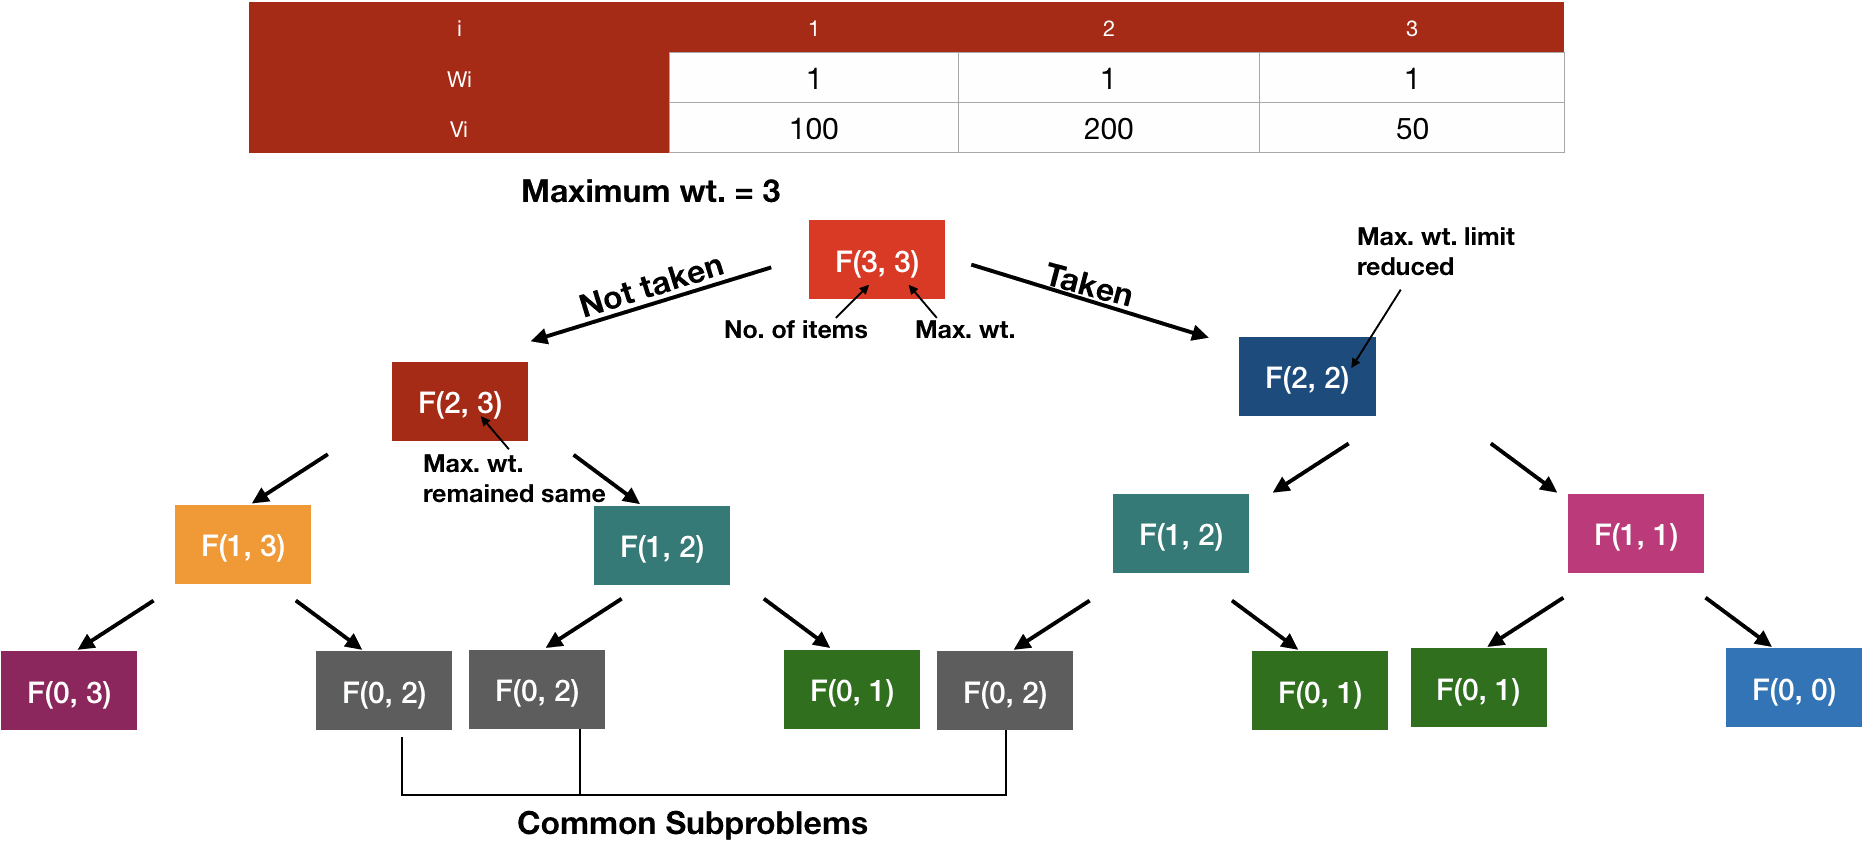

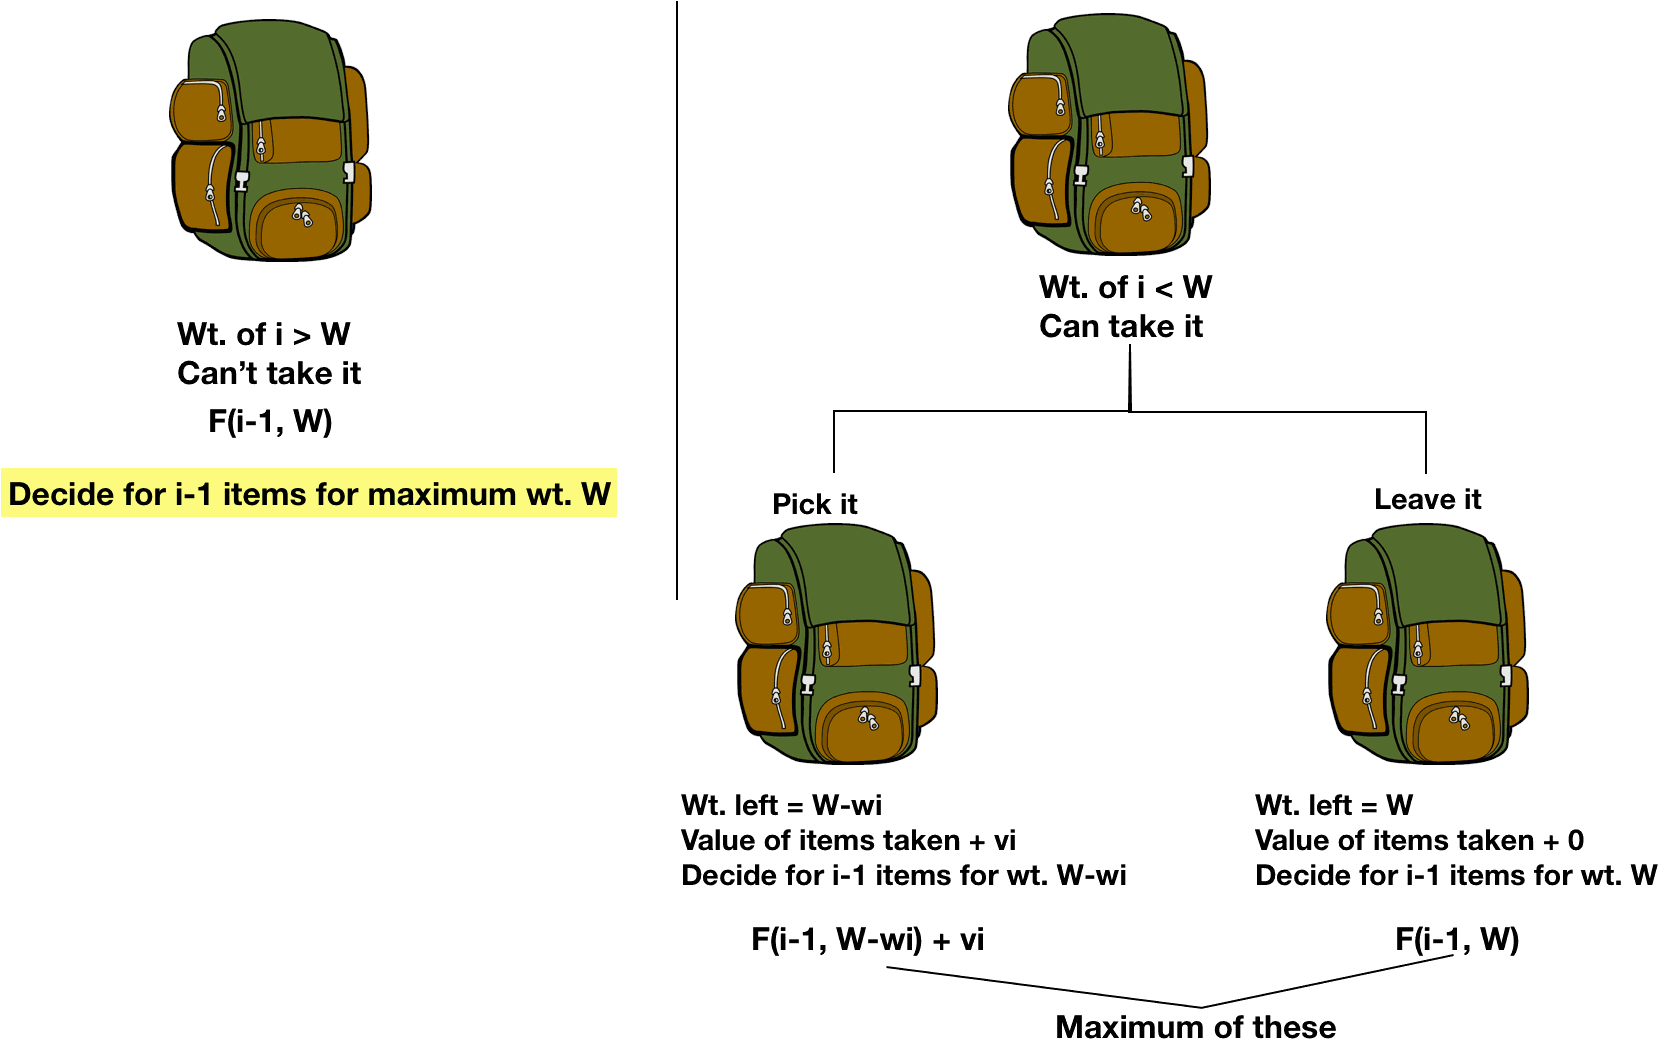

In [ ]:
class Solution:

    def KS_Tabulation(self,n,W):
        
        for i in range(n+1):
            
            for j in range(W+1):
                
                if(i == 0 or j == 0): self.dp[i][j] = 0
                
                elif(self.wt[i-1] <= j):
                    self.dp[i][j] =  max(self.val[i-1] + self.dp[i-1][j-self.wt[i-1]],
                        self.dp[i-1][j])
                
                else:
                    self.dp[i][j] = self.dp[i-1][j]
            
        return self.dp[n][W] 
    
    def KS_Memoization(self,i,W):
        
        if(i == 0 or W == 0): 
            
            self.dp[i][W] = 0
        
        if(self.dp[i][W] != -1): return self.dp[i][W]
        
        elif(self.wt[i-1] <= W):
            
            self.dp[i][W] =  max(self.val[i-1] + self.KS(i-1,W-self.wt[i-1]),
                        self.KS(i-1,W))
        else:
            
            self.dp[i][W] = self.KS(i-1,W)
            
        return self.dp[i][W]
        
    def knapSack(self,W, wt, val, n):
        
        self.wt = wt
        self.val = val
        
        self.dp = [[-1]*(W+1) for _ in range(n+1)]
        
        return self.KS(n,W)
      

## **Subset Sum Problem**

In [ ]:
class Solution:
    
    
    def SS(self,i,j):
        
        dp = [[False]*(self.sum+1) for _ in range(self.N+1)]
        
        for i in range(self.N+1):
            for j in range(self.sum+1):
                
                if(j == 0) : dp[i][j] = True
                
                elif(i == 0) : dp[i][j] = False
                
                elif(self.arr[i-1] <= j):
                    
                    dp[i][j] = (dp[i-1][j - self.arr[i-1]]) or dp[i-1][j]
                                              
                else: 
                    
                    dp[i][j] = dp[i-1][j]
                
        
        return dp[self.N][self.sum]
                    
    
    
    def isSubsetSum (self, N, arr, sum):
        
        self.N = N
        self.arr = arr
        self.sum = sum
        
        return self.SS(N,sum)
        

## **Partition Equal Subset Sum**

In [ ]:
class Solution:

    def pess(self,nums):

        sum = 0

        for x in nums: sum += x

        if(sum&1): return False

        S = (sum//2)
        N = len(nums)

        dp = [[False]*(S+1) for _ in range(N+1)]

        for i in range((N+1)):
            
            for j in range((S+1)):

                if(j == 0): dp[i][j] = True

                elif(i == 0): dp[i][j] = False

                elif(nums[i-1] <= j):

                    dp[i][j] = dp[i-1][j-nums[i-1]] or dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j]

        return dp[N][S]


    def canPartition(self, nums) -> bool:

        return self.pess(nums)
        

## **494. Target Sum**

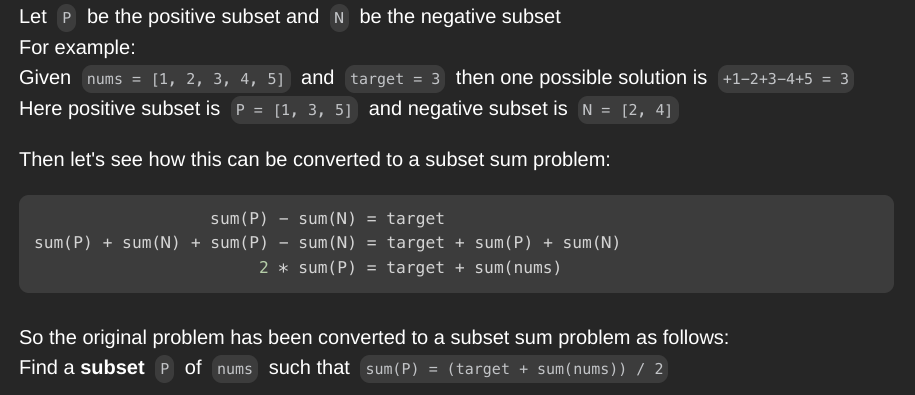

In [ ]:
class Solution:
    
    def TS(self,nums,target):

        sum = 0
        zcnt = 0

        N = len(nums)

        for x in nums: 
            sum += x
            if(x == 0): zcnt += 1
            
        # 2 * sum(P) = target + sum(nums)
        # so (target + sum(nums) must be even 

        if((target+sum) & 1) : return 0
        
        
        # Not possible if target is greater than sum

        if(abs(target) > sum) : return 0
        
        # from above explanation

        S = (sum + target) // 2

        dp = [[-1]*(S+1) for _ in range(N+1)]

        for i in range(N+1):

            for j in range(S+1):

                if(j==0): dp[i][j] = 1

                elif(i==0) : dp[i][j] = 0

                elif(nums[i-1] <= j and nums[i-1]!=0):

                    dp[i][j] = dp[i-1][j-nums[i-1]] + dp[i-1][j]

                else:

                    dp[i][j] = dp[i-1][j]

        return dp[N][S] * (2**zcnt)


    def findTargetSumWays(self, nums, target: int) -> int:

        return self.TS(nums,target)
        